<a href="https://colab.research.google.com/github/Vikasgarikapati/machinelearning/blob/main/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy


In [52]:
def pop_fitness_cal(eqn_input, pop):
    fitness = numpy.sum(pop*eqn_input, axis=1)
    return fitness

In [53]:
def select_pool(pop,fitness,num_parents):
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents


In [68]:
def crossover(parents,offspring_size):
    offspring=numpy.empty(offspring_size)
    crossover_point=numpy.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [70]:
def mutation(offspring_crossover,num_mutations=1):
    for idx in range(offspring_crossover.shape[0]):
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [56]:
eqn_input = [4,-2,3.5,5,-11,-4.7]

In [57]:
num_weights = len(eqn_input)

In [58]:
sol_per_pop = 8
num_parents_mating = 4

In [59]:
pop_size = (sol_per_pop,num_weights)

In [60]:
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[-3.7904598   0.31871661 -2.44194028  2.20120804 -2.42549955 -2.9772633 ]
 [ 3.60194263 -2.39758953 -3.41462206  2.97683512  2.64729249  1.6748699 ]
 [ 3.86109173  0.08864055  2.62926014 -2.16992701 -2.53128491  2.94510213]
 [ 3.46785895 -1.82183807 -3.53560582 -3.54963817  2.61492117 -3.80568093]
 [ 1.88745162  0.11454023 -0.87199606  0.98863203  3.73414887 -3.48230981]
 [ 1.58610516  0.61473466 -3.51673416  0.66419041  0.0847322   1.80232398]
 [ 2.37359103 -1.54029103  1.48359621 -0.52297309  3.89190774 -3.88812731]
 [ 2.70365314 -2.81316533  1.84887801 -0.93510165 -0.8694455  -0.13252741]]


In [61]:
best_outputs = []
num_generations = 1000

In [62]:
import matplotlib.pyplot


Streaming output truncated to the last 5000 lines.
  -3.18316021e+02 -2.97726330e+00]
 [ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.18040523e+02 -2.97726330e+00]
 [ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.18221091e+02 -2.97726330e+00]]
Generation :  844
Fitness
[3560.36799077 3557.39117646 3557.35670848 3554.70715806 3563.06272215
 3550.94490833 3547.91442842 3549.90068007]
Best result :  3563.0627221529485
Parents
[[ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.19417641e+02 -2.97726330e+00]
 [ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.19172665e+02 -2.97726330e+00]
 [ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.18902046e+02 -2.97726330e+00]
 [ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.18898912e+02 -2.97726330e+00]]
Crossover
[[ 3.86109173e+00  8.86405470e-02  2.62926014e+00  2.20120804e+00
  -3.19172665e+02 -2.97726330e+00]
 [ 3.8610917

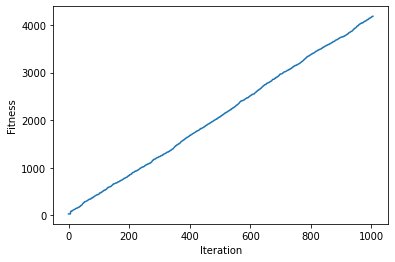

In [71]:
for generation in range(num_generations):
    print("Generation : ", generation)
    fitness = pop_fitness_cal(eqn_input, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*eqn_input, axis=1)))
    print("Best result : ", numpy.max(numpy.sum(new_population*eqn_input, axis=1)))

    parents = select_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    offspring_crossover = crossover(parents,offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

fitness = pop_fitness_cal(eqn_input, new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()